<h2 id='Part1'>A Look at the relevant data</h2>

In order to get a better understanding of the data we will be take a closer look in the first section, highlighting features and main take aways.

First, let's read in the data and necessary libraries.

Key questions that we would like to answer:

What is the AirBnb market in Seattle looking like? 
 



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
%matplotlib inline
import DataPrepFunctions as dtprep
sia = SentimentIntensityAnalyzer()
df = pd.read_csv('./listings.csv')

num_rows = df.shape[0] 
num_cols = df.shape[1]

df.shape
df.dtypes.value_counts()

df.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


<h3 id='Part1.1'> Property type </h3>

Taking a dive into the most common properties in the market and the most relevant features

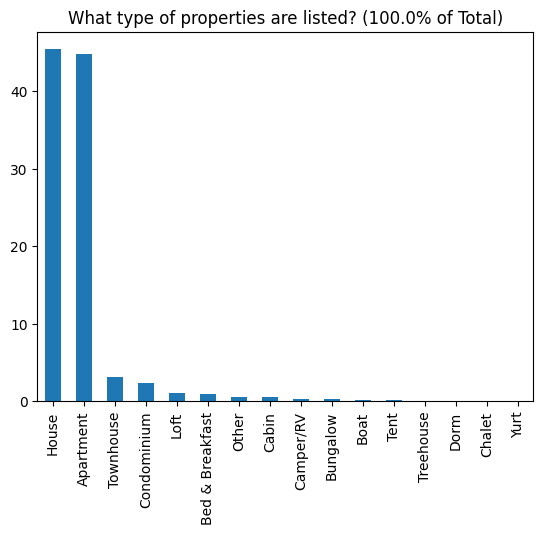

In [35]:
# Selection the columns relevant for our analysis 
prop_columns = ["property_type","room_type","bed_type","amenities","accommodates","bathrooms","bedrooms","beds"]
df_properties = df[prop_columns]

df_properties.head(5)
# selection the top 5 properties 
df_chart = df_properties['property_type'].value_counts(normalize = True)*100
sampleSize= str(np.round(np.sum(df_chart),0))
df_chart.plot(kind = "bar");
plt.title("What type of properties are listed? (" + sampleSize +"% of Total)");


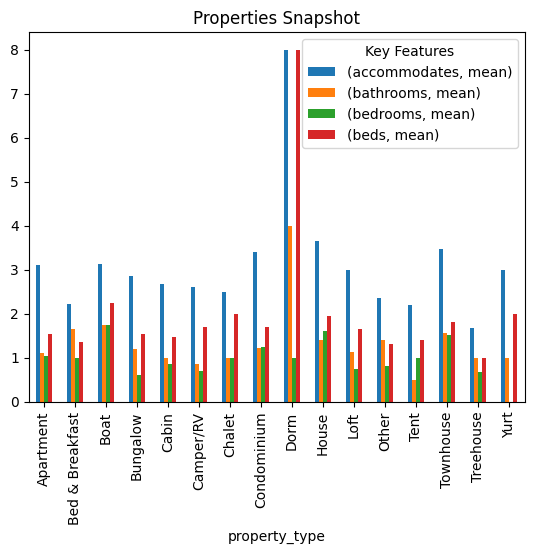

In [40]:
group_prop= df_properties.groupby("property_type")

group_prop[["accommodates","bathrooms","bedrooms","beds"]].agg(["mean"]).plot(kind = "bar")
plt.title("Properties Snapshot");
plt.legend(title="Key Features")